In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1149,2020-07-28,United Kingdom,300435.0,300111.0,45864.0,45759.0,324.0,105.0
1150,2020-07-28,Germany,205998.0,206242.0,9127.0,9122.0,-244.0,5.0
1151,2020-07-28,Iran,292328.0,293606.0,15698.0,15912.0,-1278.0,-214.0
1152,2020-07-28,Turkey,226980.0,227019.0,5628.0,5630.0,-39.0,-2.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  3530.909878682842
RMSE =  10013.829405661181


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  293.42980935875215
RMSE =  690.8221623293059


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  19224.864864864863
RMSE =  28613.75320517192
-- World performances for deaths --
MAE =  1577.3423423423424
RMSE =  1913.0743264124314


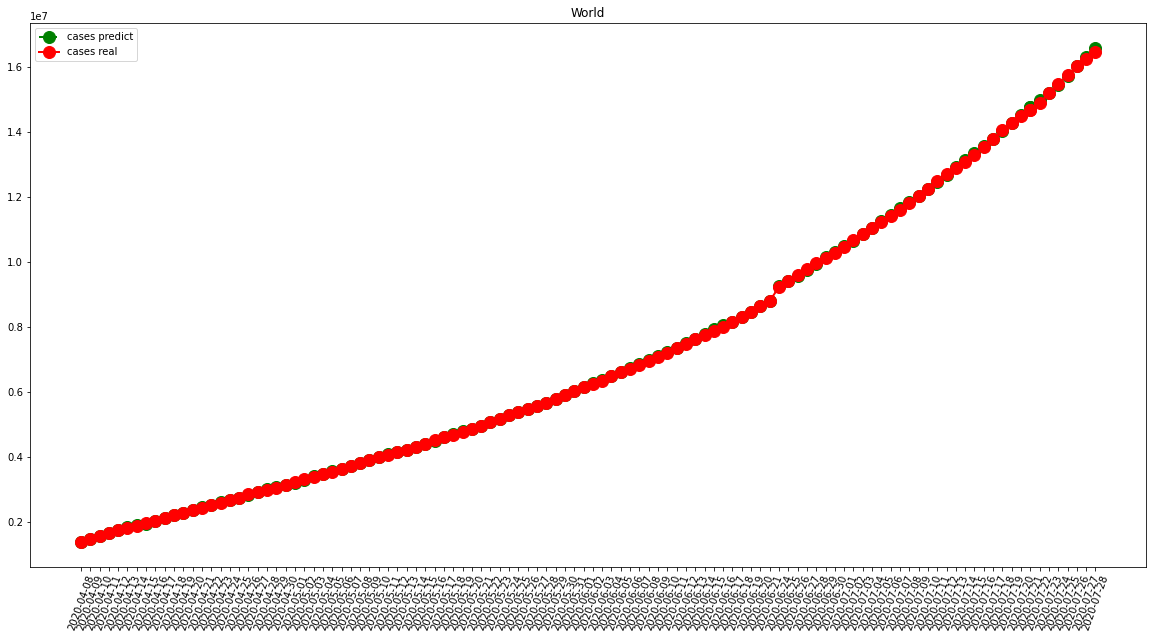

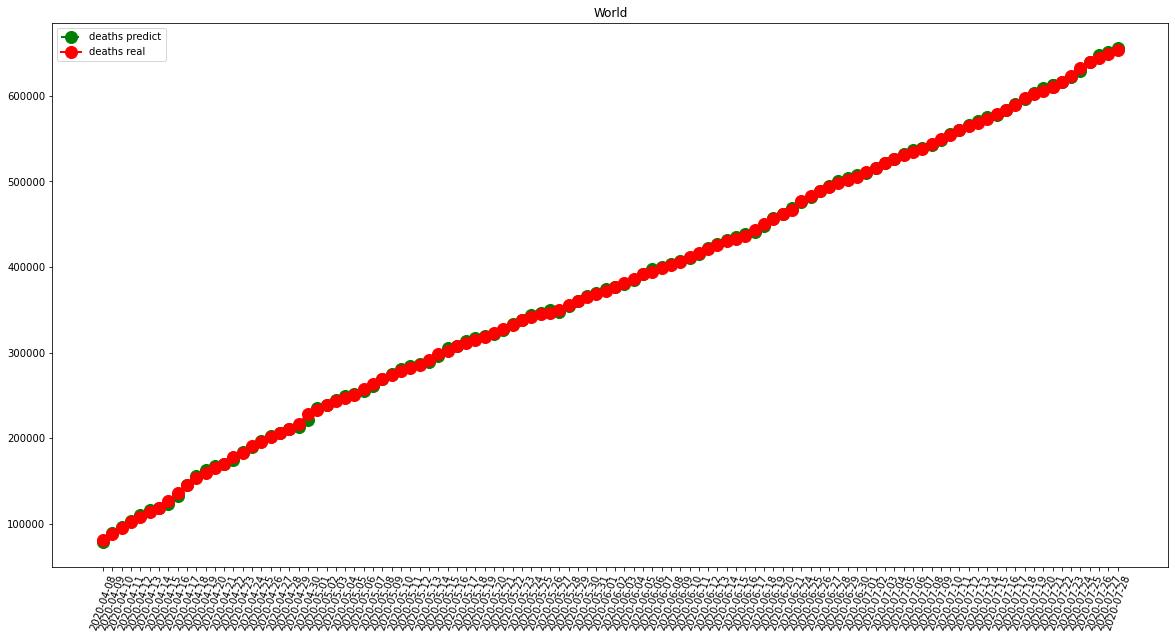

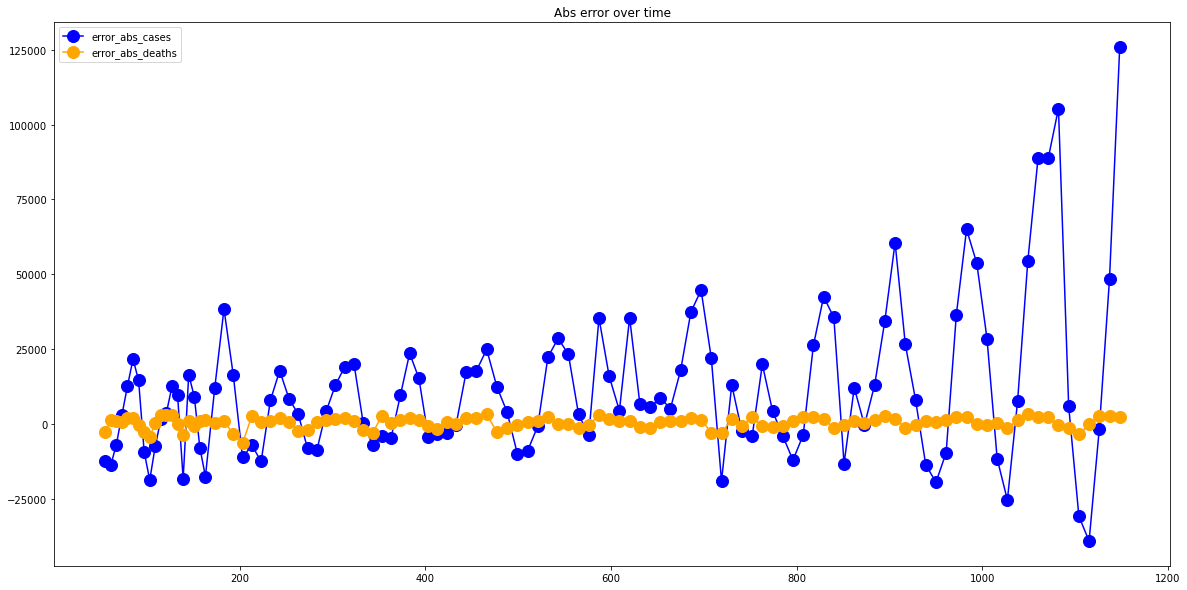

In [7]:
visShow("World")

-- France performances for cases --
MAE =  857.2727272727273
RMSE =  1378.258501104843
-- France performances for deaths --
MAE =  148.9504132231405
RMSE =  304.6732296403872


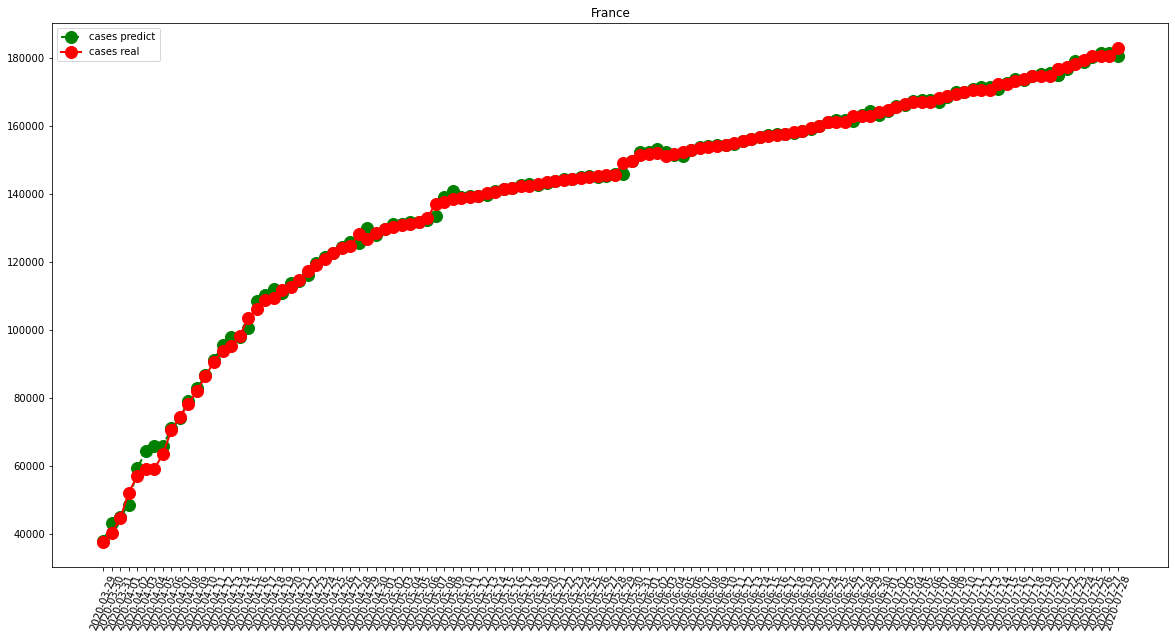

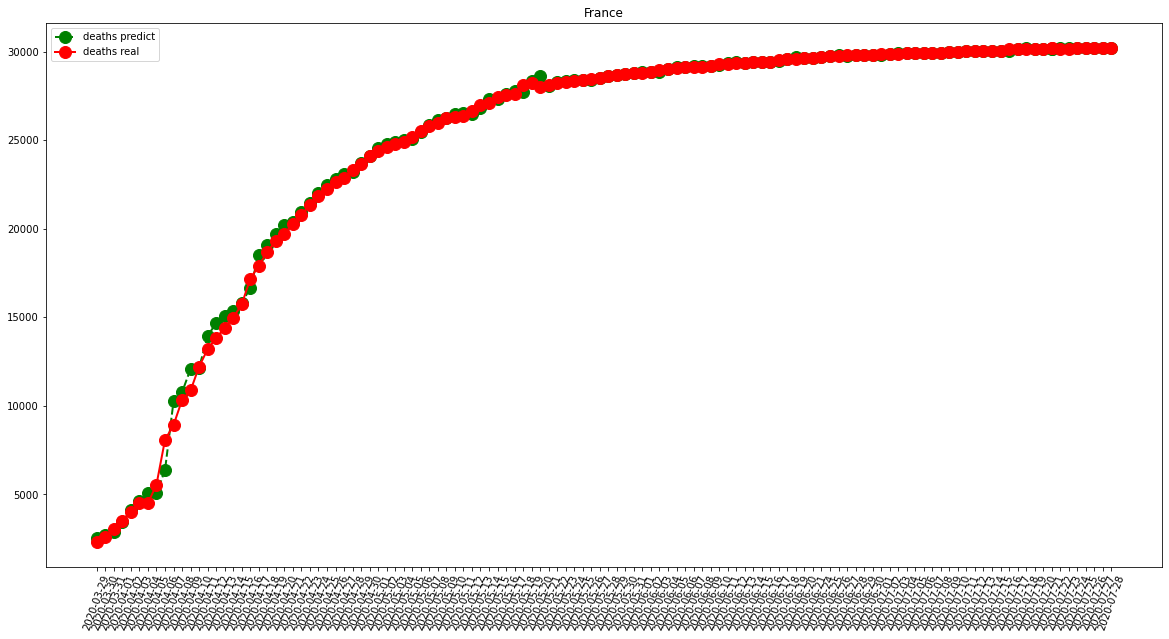

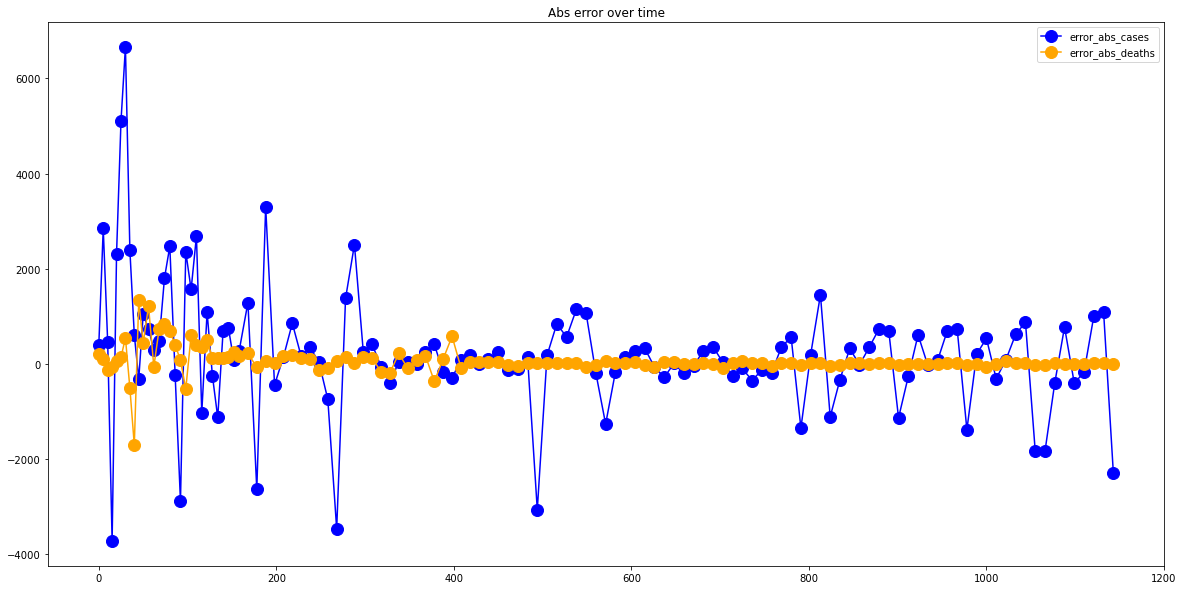

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  329.7685950413223
RMSE =  496.67309700572287
-- Italy performances for deaths --
MAE =  84.80165289256199
RMSE =  269.05111806538065


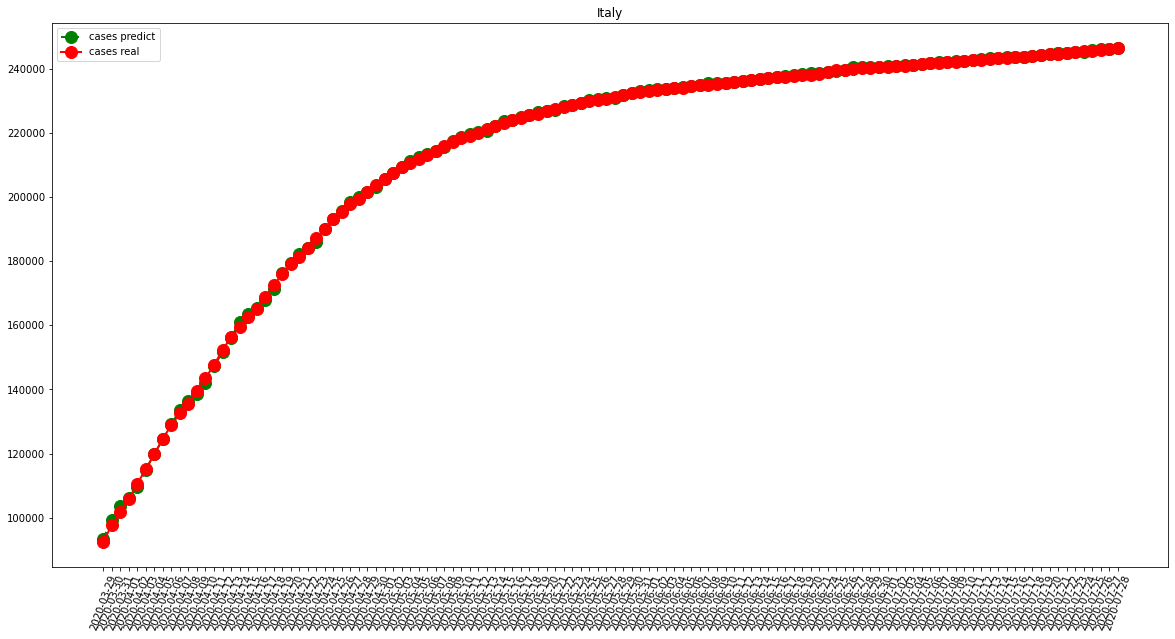

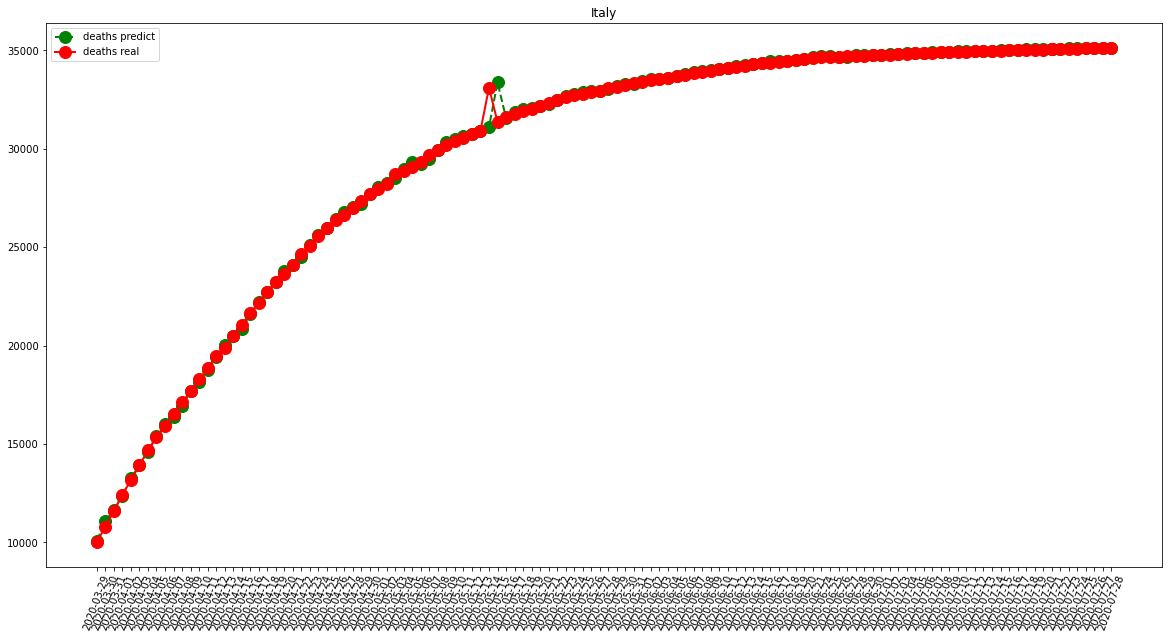

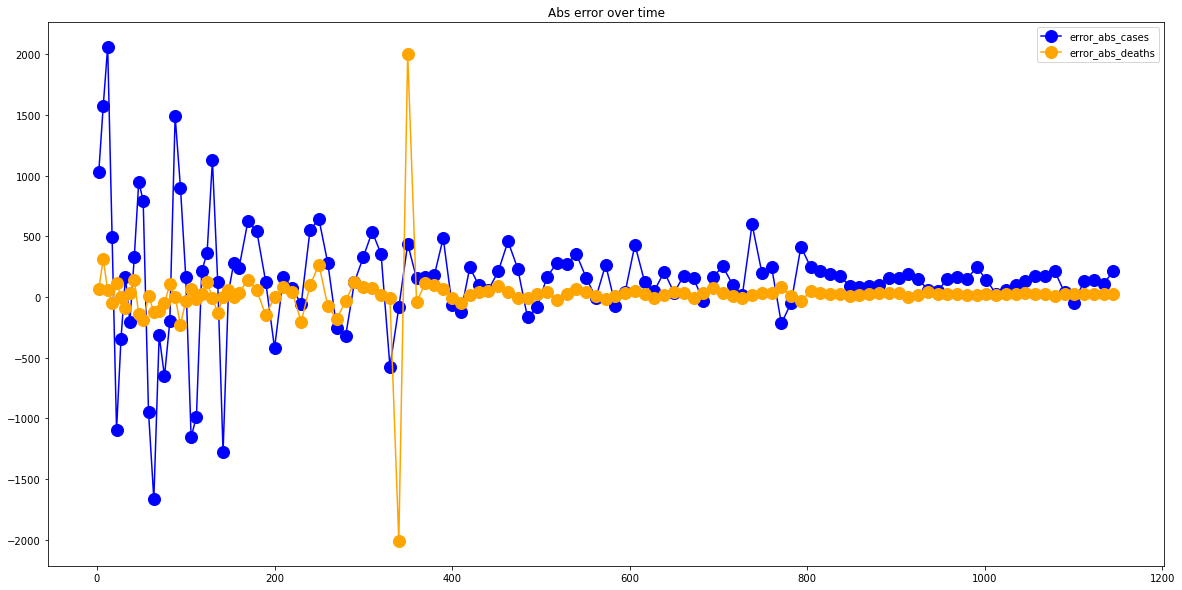

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1003.4545454545455
RMSE =  2094.3806990126445
-- Spain performances for deaths --
MAE =  151.96694214876032
RMSE =  369.01848819279934


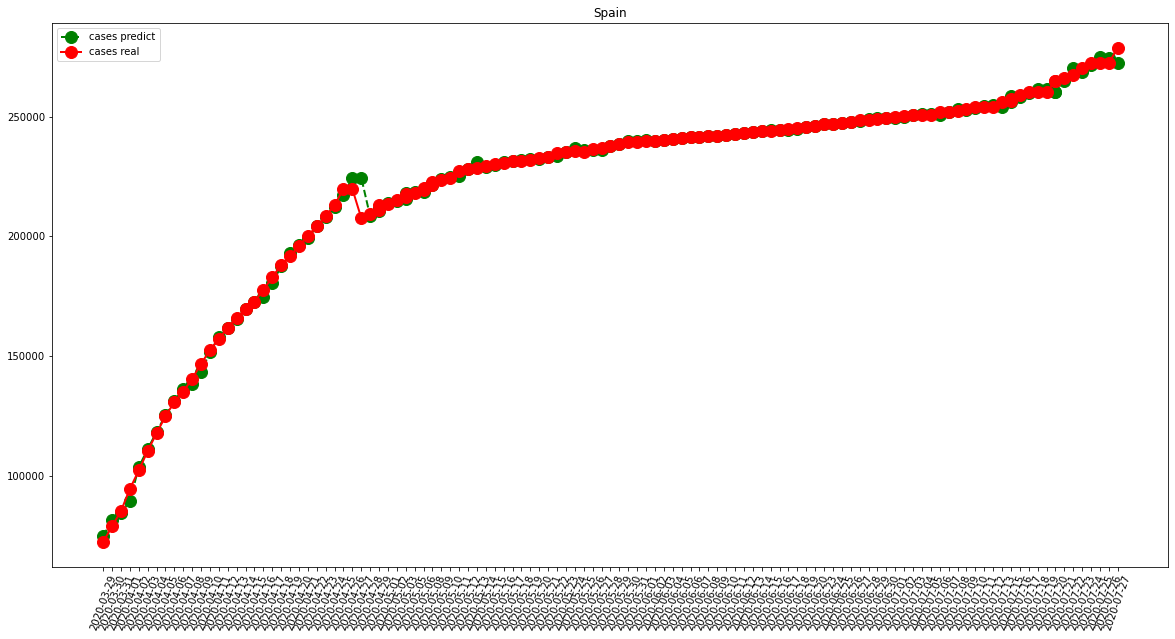

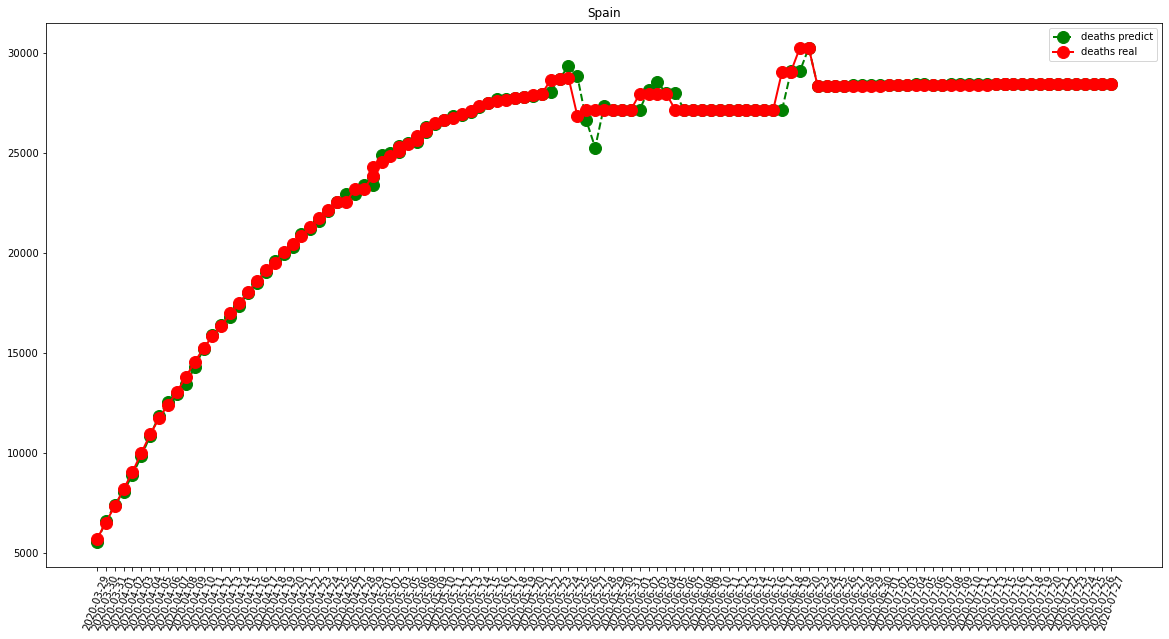

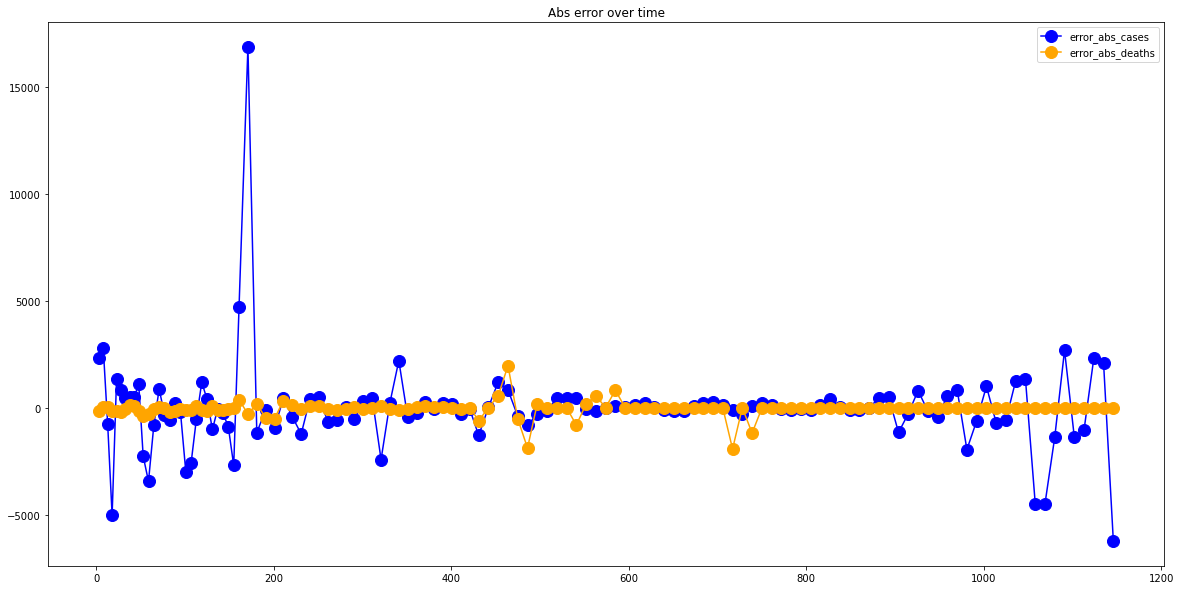

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  5719.140495867769
RMSE =  7692.133359467626
-- United States performances for deaths --
MAE =  502.53719008264466
RMSE =  730.3645585799958


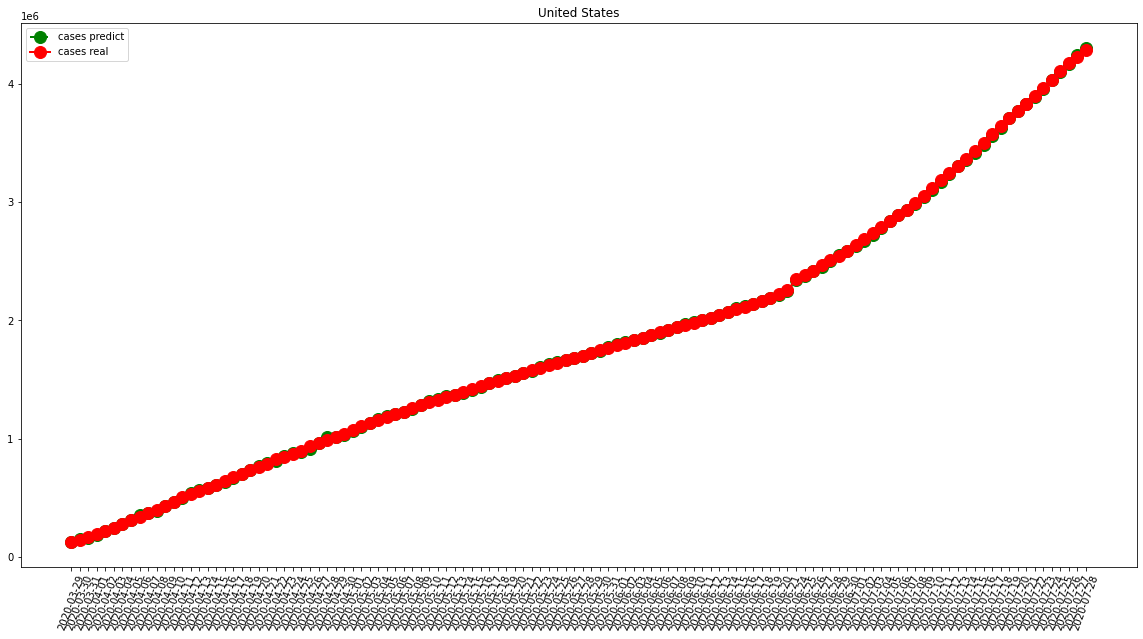

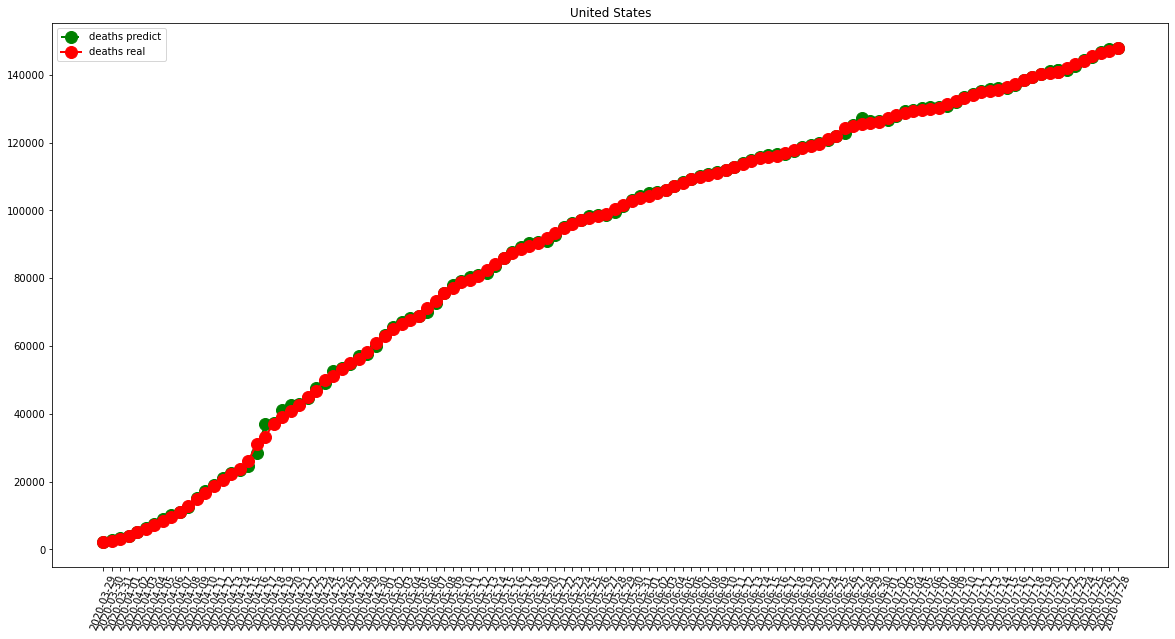

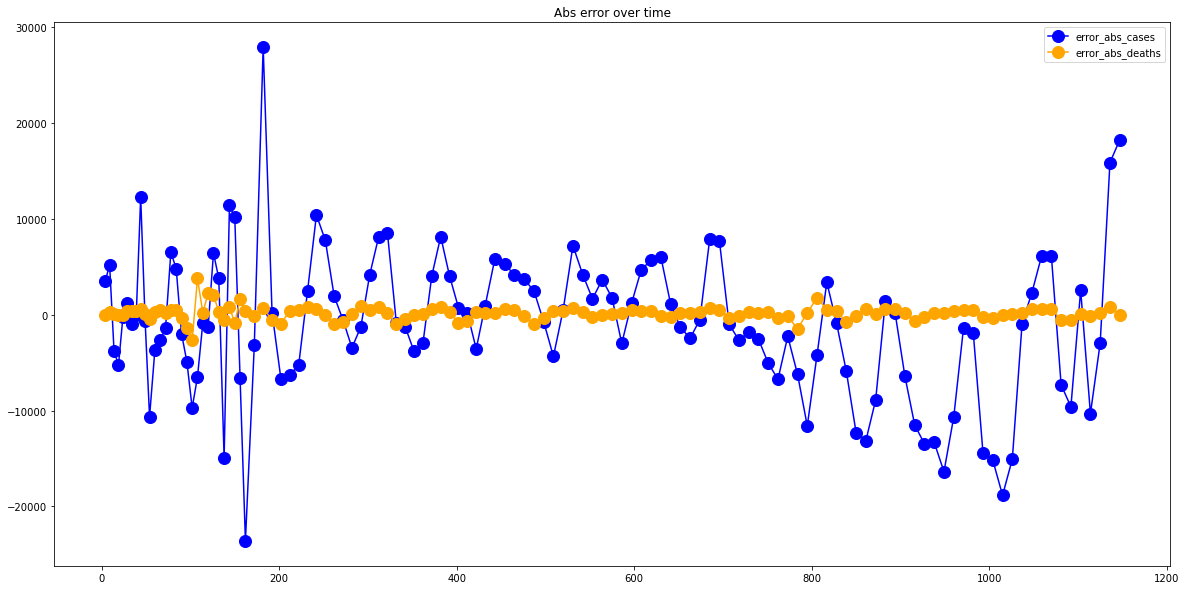

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  78.7603305785124
RMSE =  108.01935853439335
-- China performances for deaths --
MAE =  33.12396694214876
RMSE =  142.72148222185513


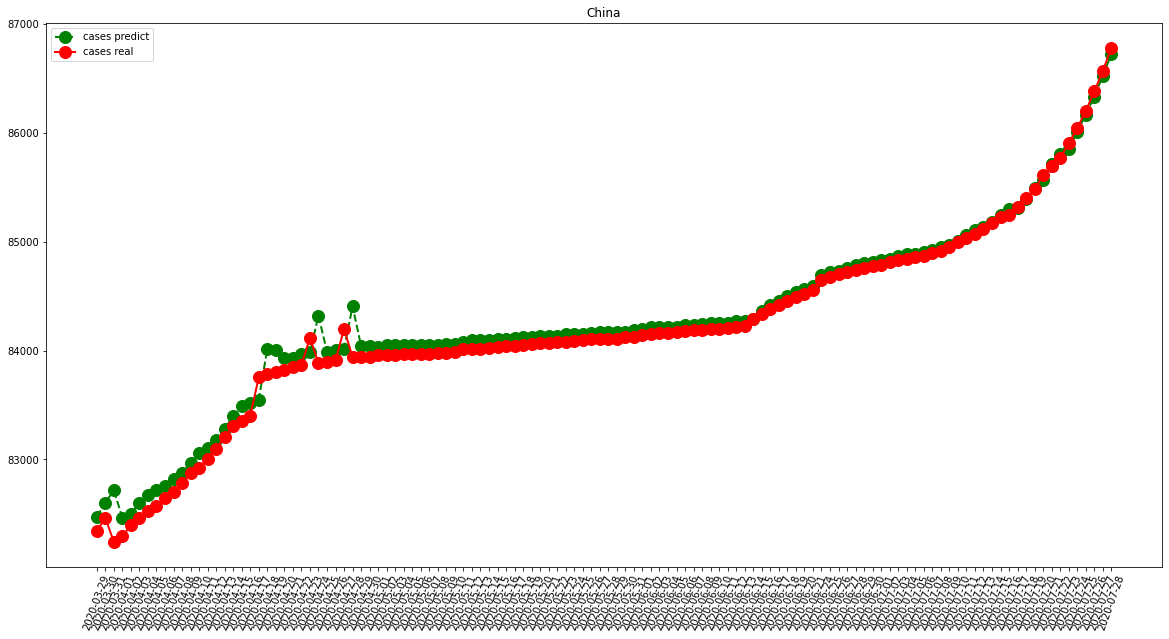

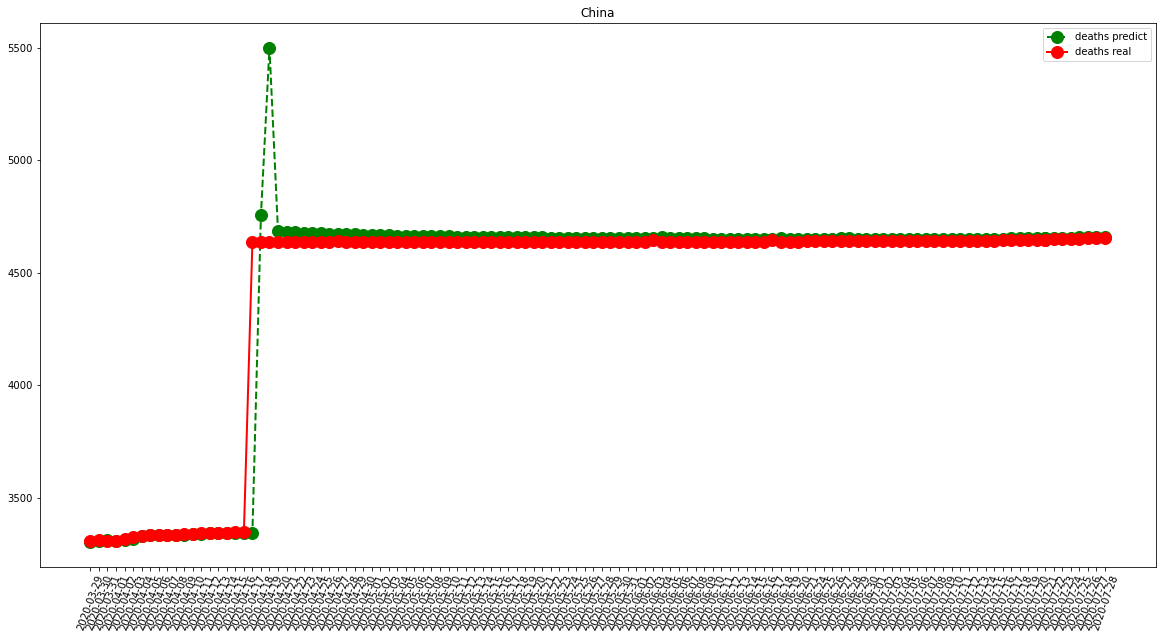

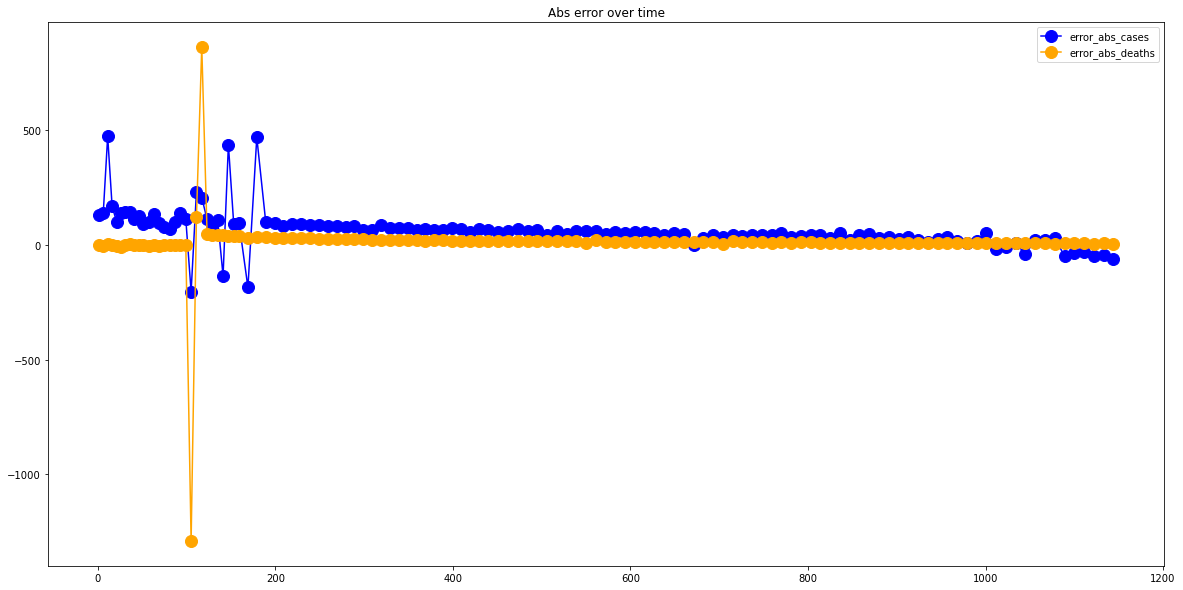

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1311.4301075268818
RMSE =  4327.574133590369
-- United Kingdom performances for deaths --
MAE =  205.21505376344086
RMSE =  508.8798049775394


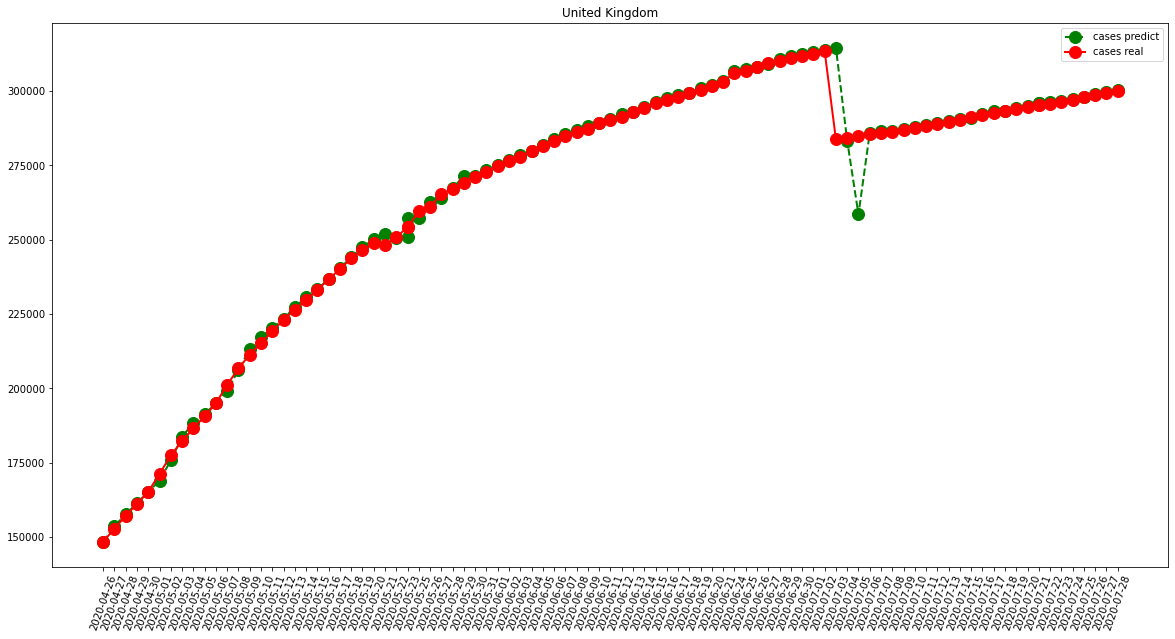

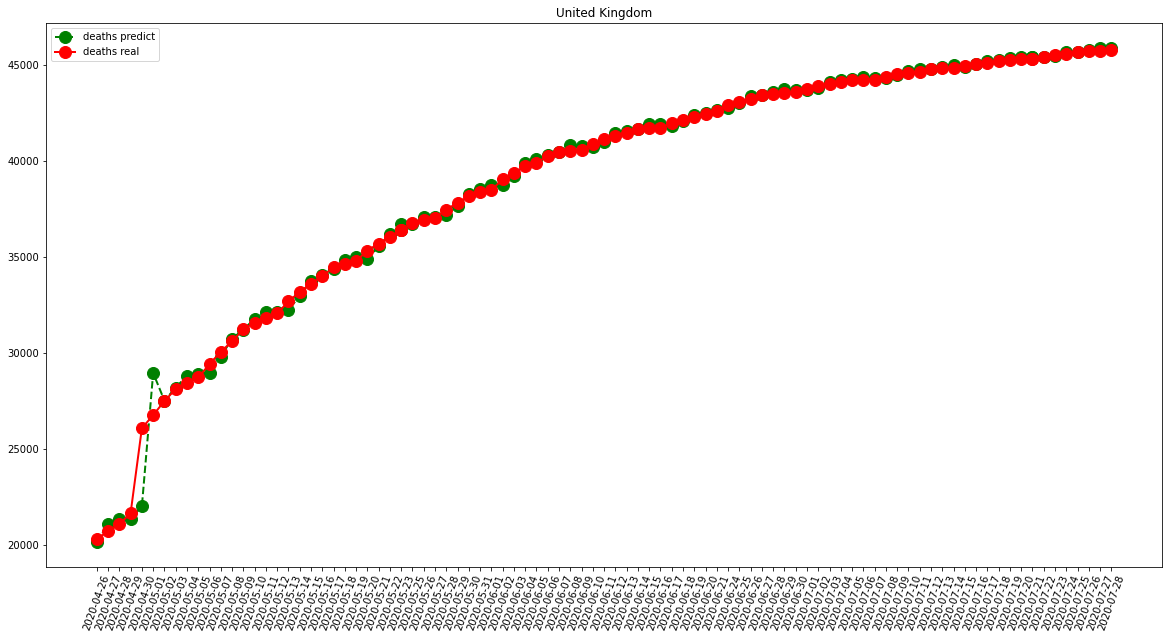

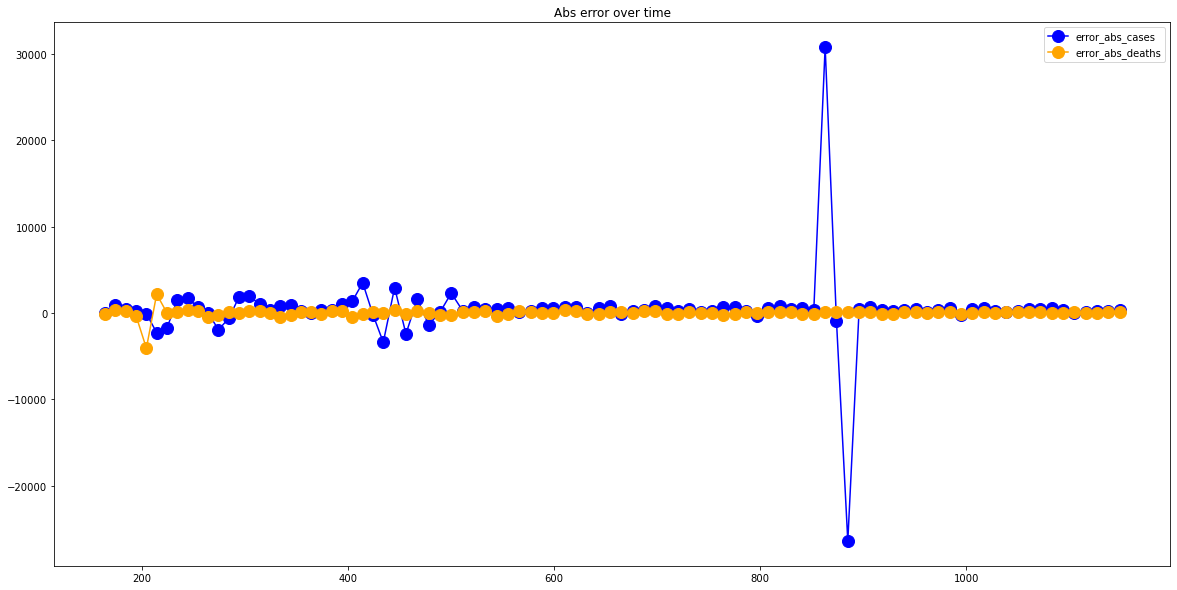

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  294.18279569892474
RMSE =  407.90090774308703
-- Germany performances for deaths --
MAE =  25.967741935483872
RMSE =  45.33234502401507


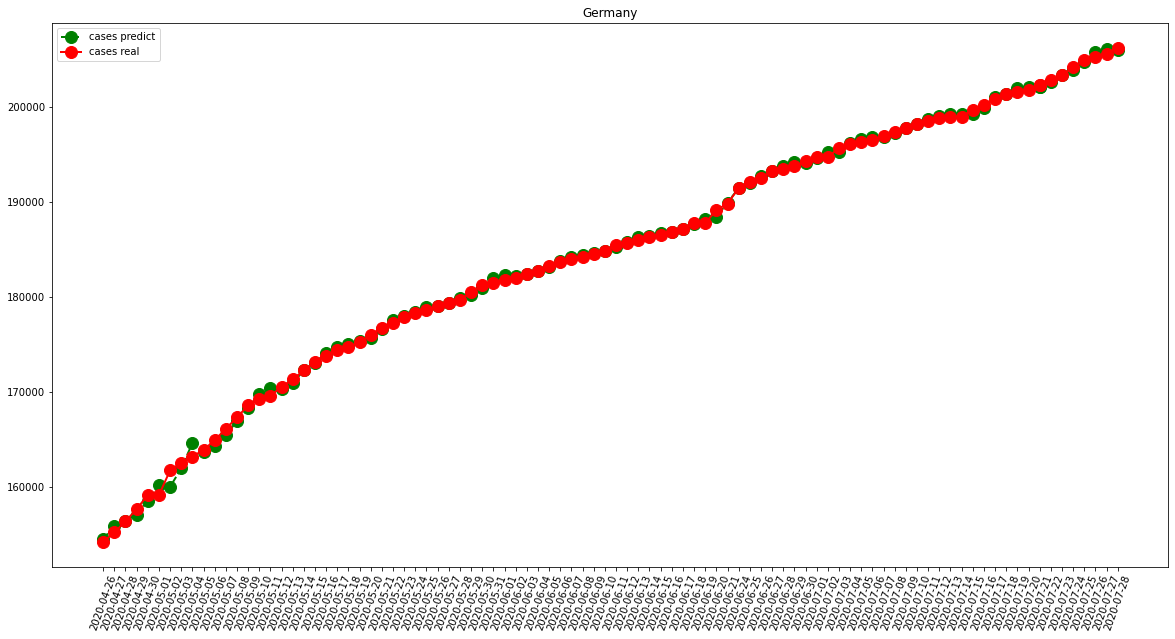

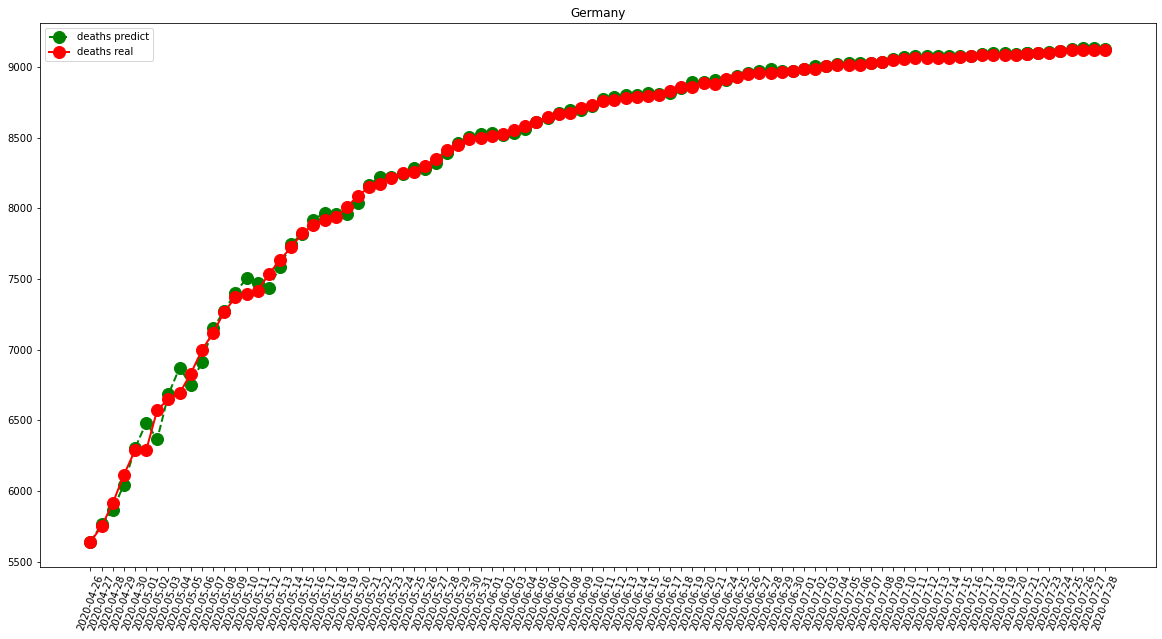

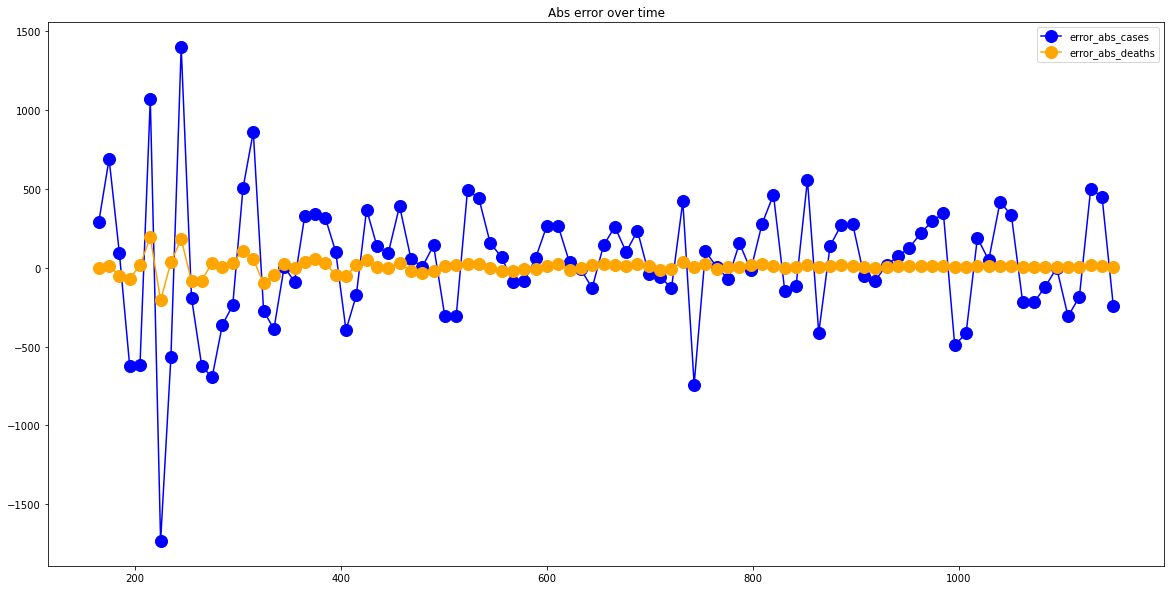

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  542.1182795698925
RMSE =  871.3333682980799
-- Iran performances for deaths --
MAE =  31.72043010752688
RMSE =  70.31893548804648


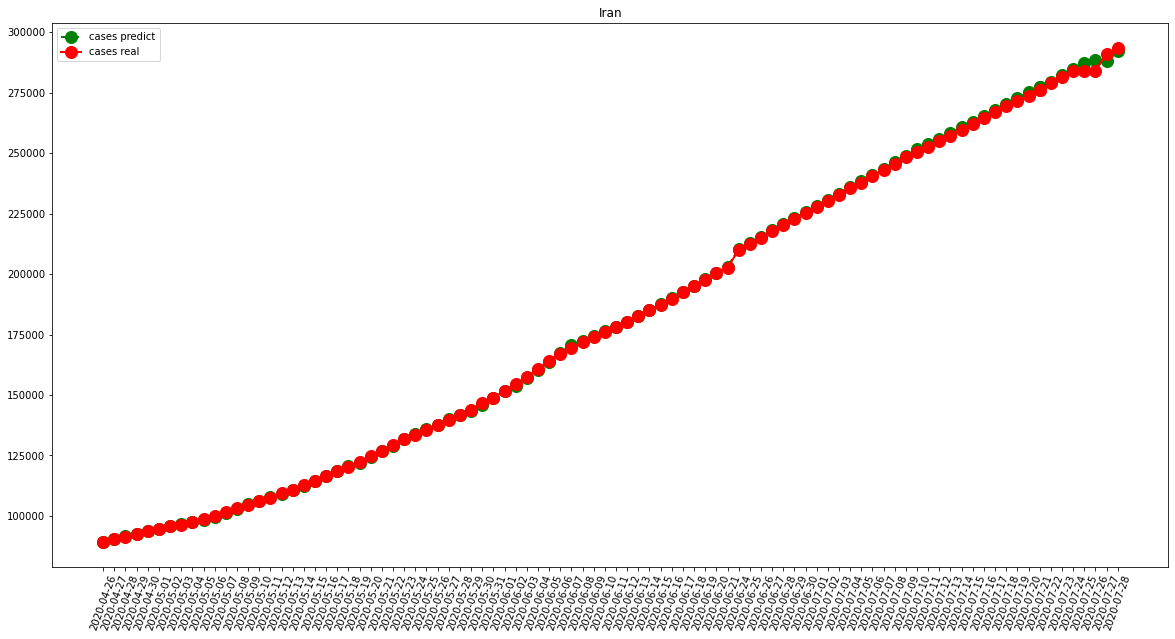

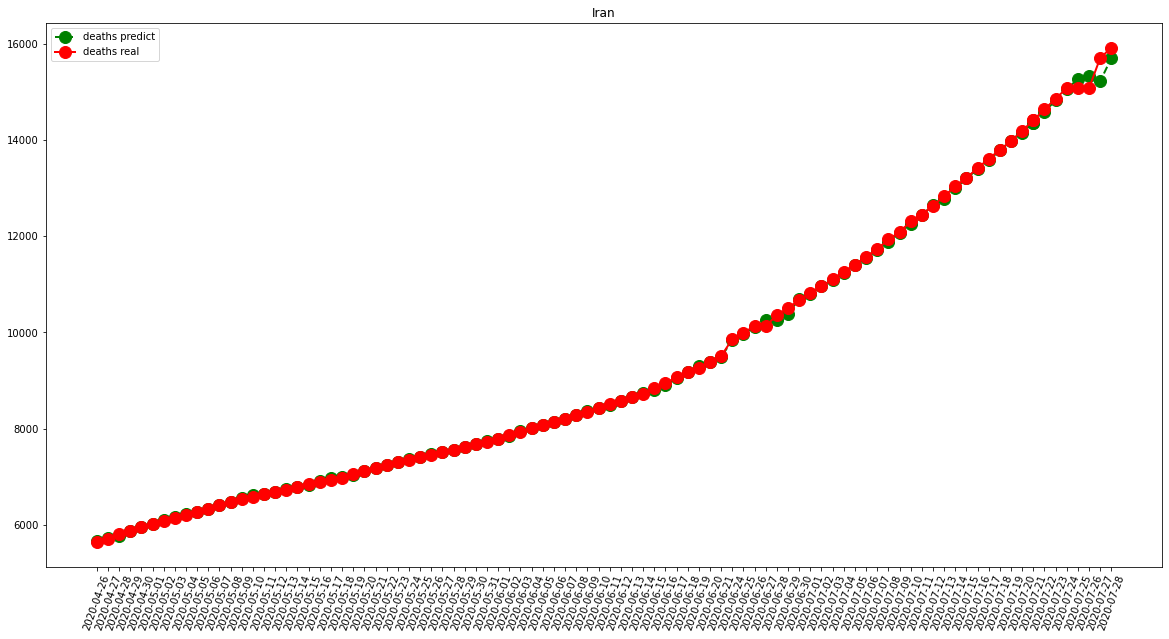

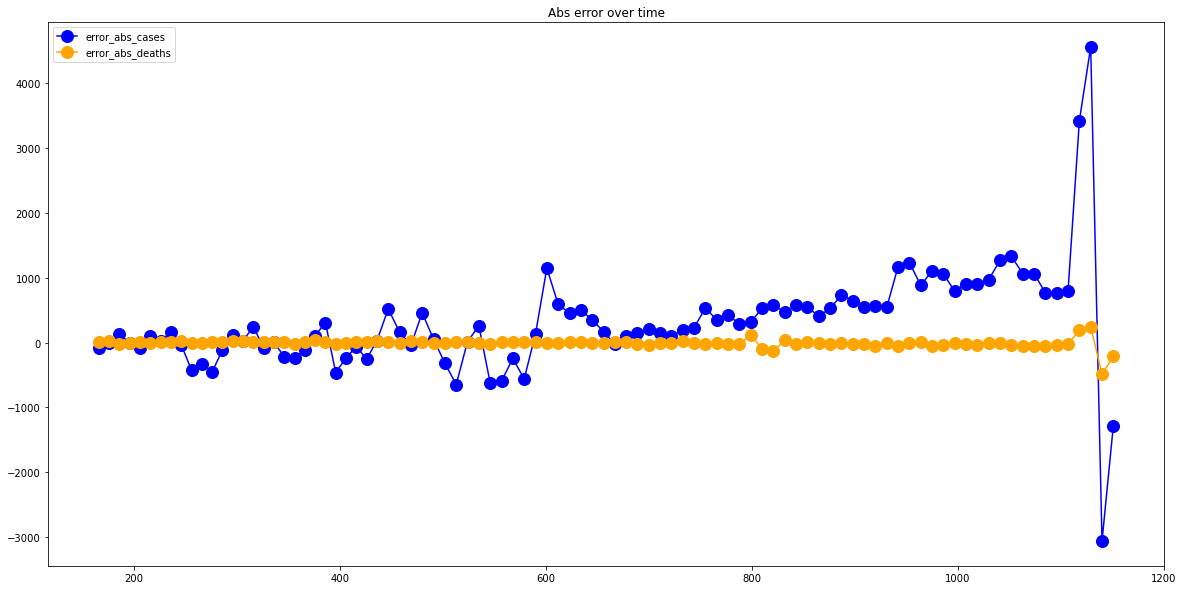

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  207.43010752688173
RMSE =  356.42708765917934
-- Turkey performances for deaths --
MAE =  20.21505376344086
RMSE =  105.25892294819977


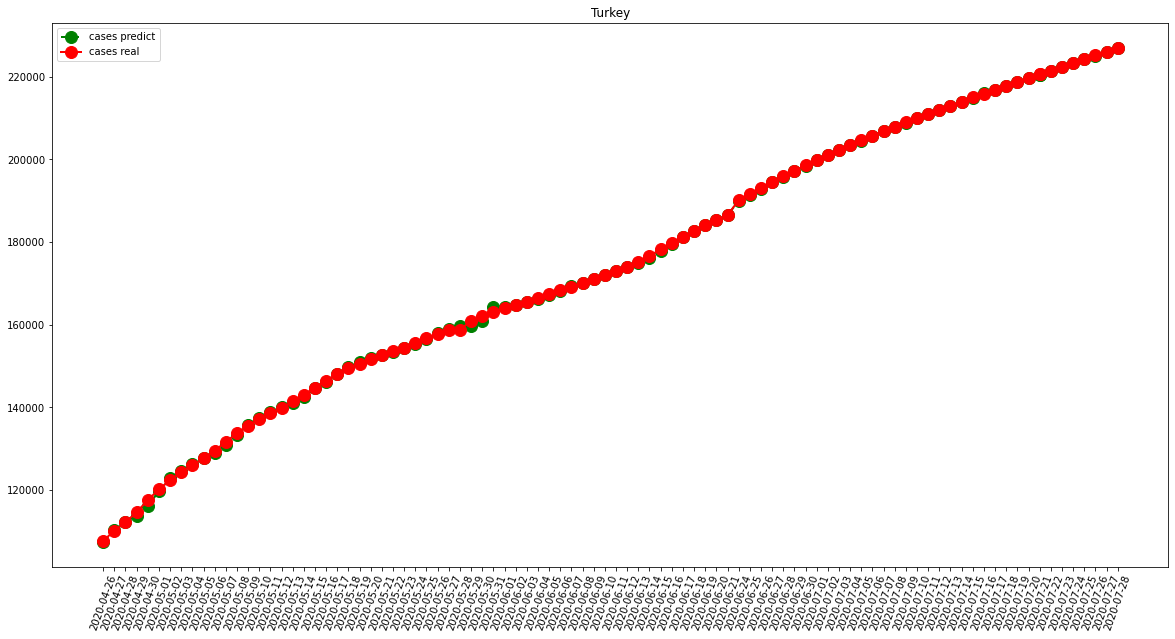

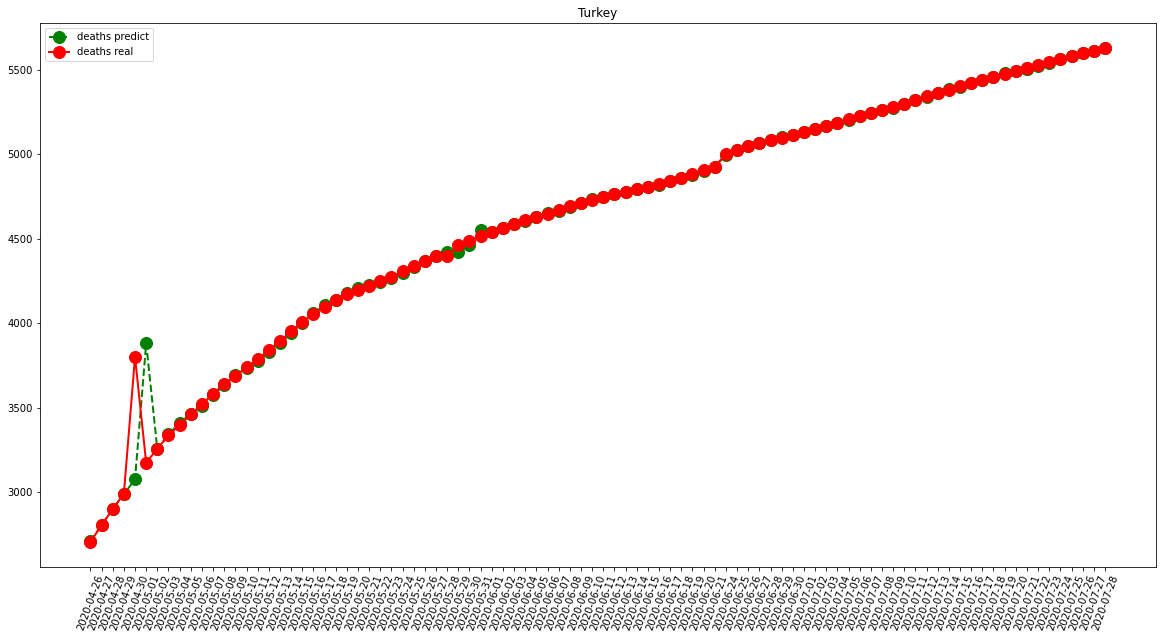

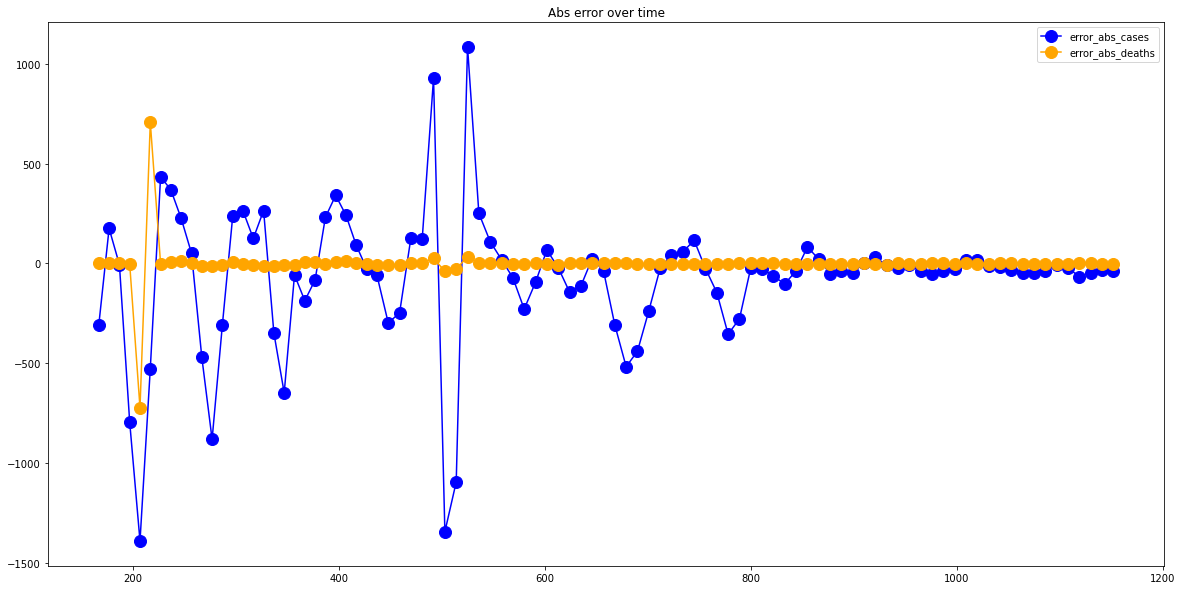

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  11440.666666666666
RMSE =  15099.468853793058
-- Brazil performances for deaths --
MAE =  389.6363636363636
RMSE =  480.57988961569157


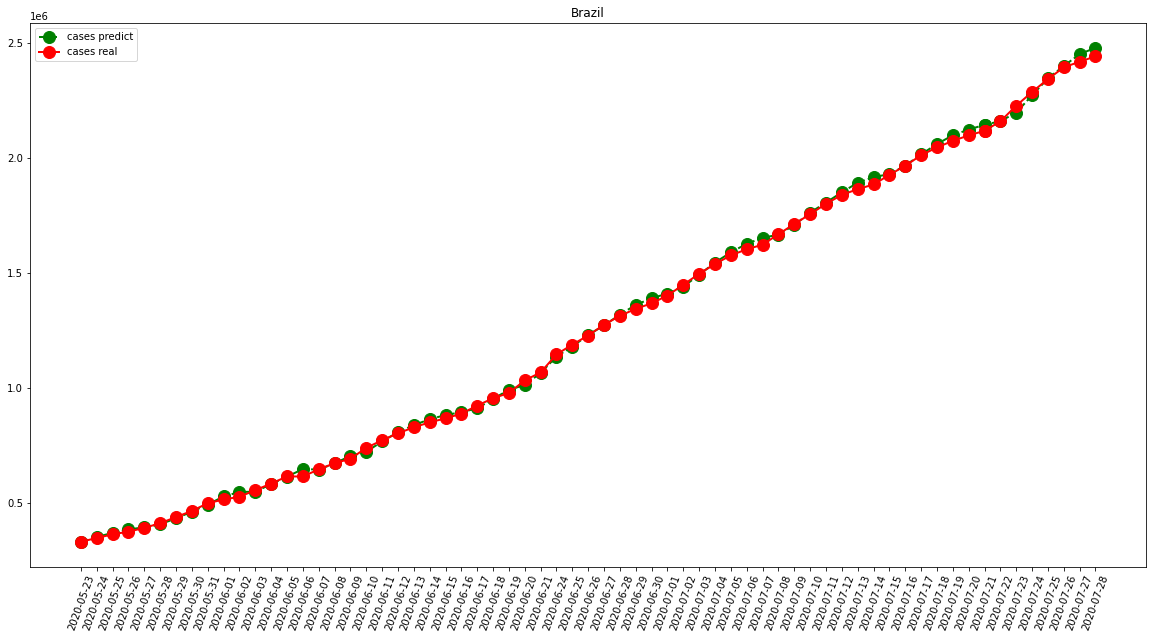

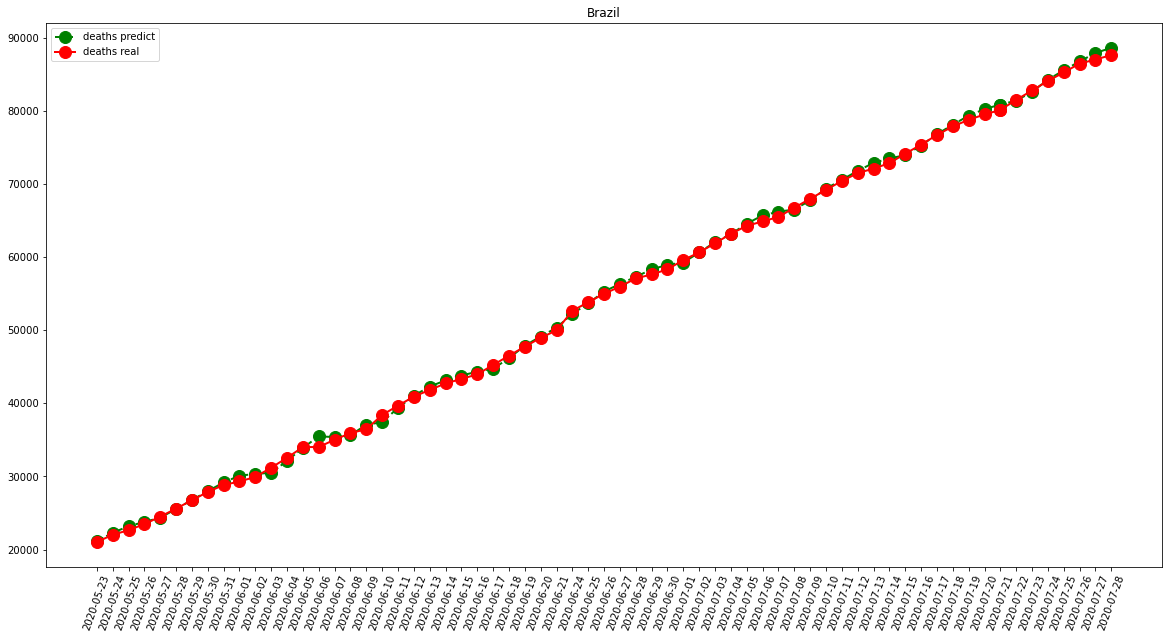

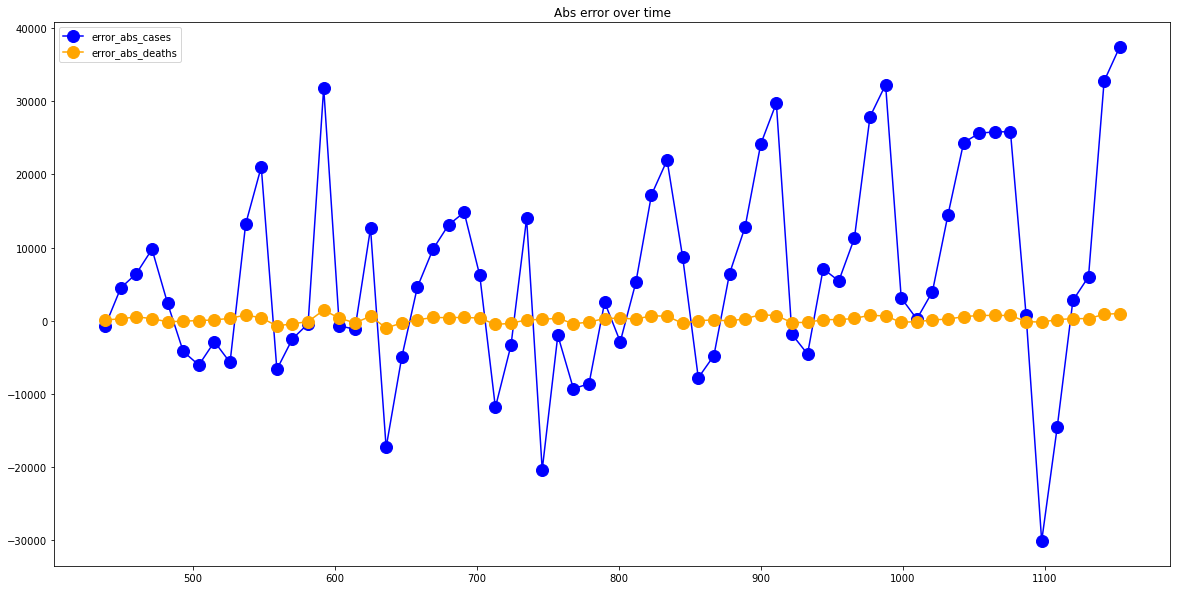

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)